# Cats and Dogs Classifier

In this notebook, we will be exploring one of the many use cases for the convolutional neural network that we have built in the previous notebook. Using the same architecture with a few tweaks, which will be explained further, let's try and see how well our model is able to tell the two animals apart. In future notebooks, we will be exploring other architectures to see better results.

In [ ]:
# This is so that I can utilize the storage space in my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---



# Preparing directory

For the image datasets, I have used the Cats and Dogs image dataset that can be found on the Kaggle repository and downloaded into the path //original_dataset//kagglecatsanddogs//. If you are not working off a notebook, you may still use the technique below to split your dataset into training, validation and test sets.

In the dataset, we have two categories - cats and dogs. Each category has 2000 images, which we will split into training, validation and test sets. The training set will consist of 1000 images, validation taking up 500 images, and test set taking the remaining 500. Before we assign each image to its respective folders, we prepare the folders.

In [ ]:
import os, shutil

cats_dataset_dir = '/content/drive/My Drive/Image Datasets/original_dataset/kagglecatsanddogs/Cats/'
dogs_dataset_dir = '/content/drive/My Drive/Image Datasets/original_dataset/kagglecatsanddogs/Dogs/'

# Making train, validation and test sets directory
base_dir = '/content/drive/My Drive/Image Datasets/cats_and_dogs/'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
# Assigning cats and dogs train, validation and test directory
# TRAIN
# cats
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# dogs
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [ ]:
# VALIDATION
val_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(val_cats_dir)

val_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(val_dogs_dir)

In [ ]:
# TEST
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

Here, we are simply copying the images to the respective folders.

In [ ]:
# Moving the files
# CATS - training set - 1000
fnames = ['{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
  src = os.path.join(cats_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

# CATS - validation set - 500
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
  src = os.path.join(cats_dataset_dir, fname)
  dst = os.path.join(val_cats_dir, fname)
  shutil.copyfile(src, dst)

# CATS - test set - 500
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
  src = os.path.join(cats_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)


# DOGS - training set - 1000
fnames = ['{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
  src = os.path.join(dogs_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

# DOGS - validation set - 500
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
  src = os.path.join(dogs_dataset_dir, fname)
  dst = os.path.join(val_dogs_dir, fname)
  shutil.copyfile(src, dst)

# DOGS - test set - 500
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
  src = os.path.join(dogs_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
print('Total training cat images: ', len(os.listdir(train_cats_dir)))
print('Total validation cat images: ', len(os.listdir(val_cats_dir)))
print('Total test cat images: ', len(os.listdir(test_cats_dir)))

print('Total training dog images: ', len(os.listdir(train_dogs_dir)))
print('Total validation dog images: ', len(os.listdir(val_dogs_dir)))
print('Total test dog images: ', len(os.listdir(test_dogs_dir)))

Total training cat images:  1000
Total validation cat images:  500
Total test cat images:  500
Total training dog images:  1000
Total validation dog images:  500
Total test dog images:  500




---



# Building the ConvNet

As mentioned, the convolutional neural network that we are using here is the same as the one we built in the last notebook. We will build two models, with the first one taking in default images while the second one taking in images that are augmented. Then, the accuracy and loss of each model are compared.

In the last layer, we are using the sigmoid activation as we are doing a binary classification. Take note that when tackling a multi-classification problem, softmax activation function usually yields a better result.
While the probabilities sum for softmax activation function will yield 1, that for sigmoid activation function will not.

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

# Data Preprocessing

1. Read the image files
2. Decode the JPEG content to RGB grids of pixels
3. Convert them to floating point tensors
4. Rescale the pixel values (0-255) to (0, 1)


By using the ImageDataGenerator module, we can customize our own preprocessing pipeline before we fit the model to the images. Here, we will do a quick rescale before fitting the model.






The ImageDataGenerator can take in much more arguments like shear_range, zoom_range, horizontal_flip or vertical_flip to help generate more images of such properties. You can check out [this page](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) to make more tweaks before training.





Then, we generate batches of augmented images from our directory using flow_from_directory() which also takes in a few parameters like class_mode and batch_size. The class_mode parameter determines how we transform our label arrays. For example, a 'categorical' would do a one-hot encoding to the arrays of labels, while 'binary' here will return a 1D binary labels.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# class_mode: binary because we need binary labels (from using binary_crossentropy)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Output of the generators
for data, label in train_generator:
  print("Data batch shape: ", data.shape)
  print("Label batch shape: ", label.shape)
  break

Data batch shape:  (20, 150, 150, 3)
Label batch shape:  (20,)


# Fit the model

Remember: the steps_per_epoch multiplied with epochs should return you the number of data in your training set, here 2000(1000 cat images and 1000 dog images).

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=50)


Epoch 1/20
100/100 [==============================] - 791s 8s/step - loss: 0.6821 - accuracy: 0.5690 - val_loss: 0.6653 - val_accuracy: 0.5650
Epoch 2/20
100/100 [==============================] - 105s 1s/step - loss: 0.6511 - accuracy: 0.6205 - val_loss: 0.6553 - val_accuracy: 0.5890
Epoch 3/20
100/100 [==============================] - 106s 1s/step - loss: 0.6100 - accuracy: 0.6660 - val_loss: 0.6291 - val_accuracy: 0.6290
Epoch 4/20
100/100 [==============================] - 107s 1s/step - loss: 0.5691 - accuracy: 0.7040 - val_loss: 0.5753 - val_accuracy: 0.6830
Epoch 5/20
100/100 [==============================] - 110s 1s/step - loss: 0.5378 - accuracy: 0.7225 - val_loss: 0.5586 - val_accuracy: 0.7110
Epoch 6/20
100/100 [==============================] - 106s 1s/step - loss: 0.5072 - accuracy: 0.7545 - val_loss: 0.6292 - val_accuracy: 0.6760
Epoch 7/20
100/100 [==============================] - 106s 1s/step - loss: 0.4813 - accuracy: 0.7775 - val_loss: 0.5451 - val_accuracy: 0.7080

Using fit_generator, it expects as its first argument a Python generator that yield batches of inputs and targets indefinitely, we need to tell the Keras model how many samples to draw before declaring an epoch is over
- steps_per_epoch

In [ ]:
print("Training accuracy: ", history.history['accuracy'][-1])
print("Validation accuracy: ", history.history['val_accuracy'][-1])

print("Training loss: ", history.history['loss'][-1])
print("Validation loss: ", history.history['val_loss'][-1])

Training accuracy:  0.925000011920929
Validation accuracy:  0.7400000095367432
Training loss:  0.19486193358898163
Validation loss:  0.6532317996025085


As we have stored our model in the *history* variable, we have access to insights that describe our model here, namely: accuracy, loss, validation accuracy and validation loss.

Taking number of epochs as X, and the variable to see as Y, we plot a graph to see how the accuracy and validation accuracy changed during training, as well as the loss and validation loss.

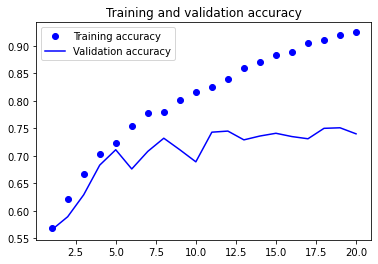

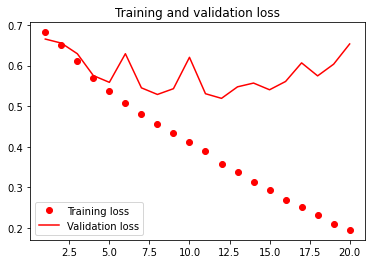

In [ ]:
# Plot the loss and accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Not very impressive apparently, with the validation loss increasing towards the end of training. The validation accuracy also levels off towards the end. However, we can see that our training accuracy is not consistent with our validation accuracy, and this is a sign of overfitting. We will try to tackle this problem below through data augmentation, and hopefully, it gives us a better accuracy. This is, of course, not the only way to improve the accuracy of a model, but it can help. 

Before that, let's save our model.

In [ ]:
# Save the model
model.save("cats_dogs_classifier.h5")

# Data Augmentation

Using the ImageDataGenerator, we can fill up the arguments on how we want to augment our data.

In [ ]:
datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest')

Parameters:

- rotation_range: values in degrees(0-180) to randomly rotate images

- width_shift_range/height_shift_range: a fraction of total width/height to randomly translate images vertically or horizontally

- shear_range: apply shearing transformations

- zoom_range: randomly zooming images

- horizontal_flip: flip random images horizontally

- fill_mode: used for filling in newly created pixels, which can appear after a rotation or width/height shift

Let's take a look at our augmented images:

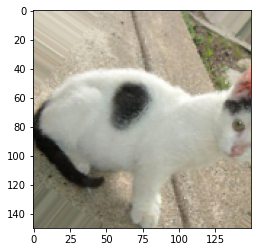

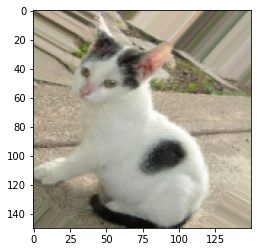

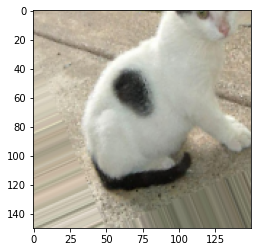

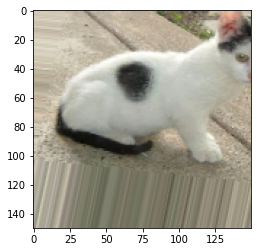

In [ ]:
from keras.preprocessing import image

train_cats_dir = os.path.join(train_dir, 'cats')
val_cats_dir = os.path.join(validation_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')
val_dogs_dir = os.path.join(validation_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# 4th image path
image_path = fnames[3]

img = image.load_img(image_path, target_size=(150, 150))
x = image.img_to_array(img) # convert image to array
x = x.reshape((1, ) + x.shape) # reshape to (1, 150, 150, 3)


# Augment one image and take a look
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)

  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0:
    break

plt.show()

# Build another model and pass in the augmented images

Here, with the same model, we are adding a layer of Dropout. What dropout does is that it is a regularization technique to prevent over-fitting of the model, which we don't have a problem of, but you can tinker with it and remove it to see the results. This dropout essentially thins out and omits the hidden and visible units(or weights) at random, based on the learning rate set, so that the model has the chance to generalize the features learnt.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())

# Droput layer
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

Now, we train the model like how we trained it previously, except augmenting the images when we pass them into the train_generator, which we will fit the model onto later on.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 20,
                              validation_data = validation_generator,
                              validation_steps = 50)

In [ ]:
acc = history.history['acc'][-1]
val_acc = history.history['val_acc'][-1]
loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print("Training accuracy: ", acc)
print("Training loss: ", loss)

print("Validation accuracy: ", val_acc)
print("Validation loss: ", val_loss)

Training accuracy:  0.6862373948097229
Training loss:  0.597700297832489
Validation accuracy:  0.6959999799728394
Validation loss:  0.576677680015564


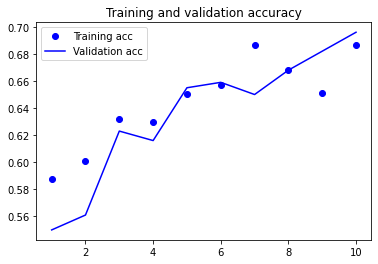

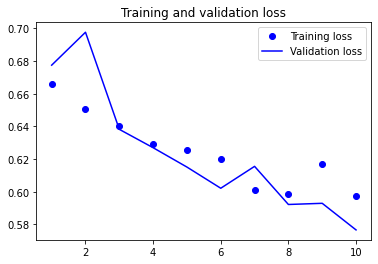

In [ ]:
epochs = range(1, len(history.history['acc'])+1)

plt.plot(epochs, history.history['acc'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As presented, both the accuracy and validation accuracy are more consistent with each other, though the overall accuracy has decreased. We can further tweak the parameters or preprocess the data better to achieve a higher accuracy.


One thing to note, however, is that thet training accuracy and loss, as seen, are quite scattered during training. This is due to the dropout layer taking effect, allowing the model to learn the weights at random. Clearly, we would want our model to NOT overfit before we start improving its accuracy consistently.

---



Now that you have seen how to preprocess the images, try tweaking the preprocessing pipeline to achieve a higher accuracy. 